# Data preprocessing and analysis

In [1]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import csv
import string
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
import re

In [2]:
df = pd.read_csv('data/raw-loneliness-dataset-2018.csv')

# df['text'] = df[['Title', 'Abstract']].apply(lambda x: '. '.join(x), axis=1)

# Compute dataset statistics

In [3]:
doc_count = df.shape[0]
abstract_structured_count = sum(df['abstract_structured'])

# filter: older adults, note here we count 'maybe' as '1'
OA_counts = df['filter_OA_include'].value_counts()
OA_in_count = OA_counts['1']
OA_out_count = OA_counts['0']
OA_maybe_count = OA_counts['maybe']
OA_selectivity = (OA_in_count + OA_maybe_count) / doc_count

# filter: study, note here we count 'maybe' as '1'
study_counts = df['filter_study_include'].value_counts()
study_in_count = study_counts['1']
study_out_count = study_counts['0']
study_maybe_count = study_counts['maybe']
study_selectivity = (study_in_count + study_maybe_count) / doc_count

# screening labels, note here we count 'maybe' as '1'
doc_in_count = df.loc[(df['filter_study_include'].isin(['1', 'maybe'])) & (df['filter_OA_include'].isin(['1', 'maybe']))].shape[0]
doc_in_prop = doc_in_count / doc_count

### Plot predicate characteristics

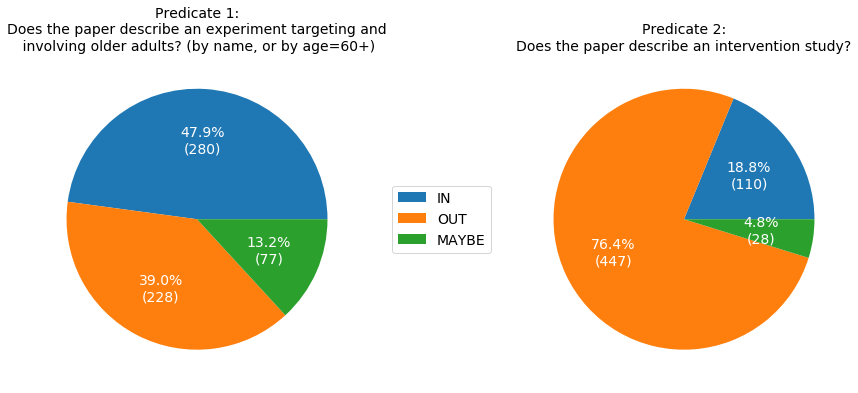

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(aspect="equal"))
labels = ['IN', 'OUT', 'MAYBE']


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Predicate 
data1 = [OA_in_count, OA_out_count, OA_maybe_count]
wedges, texts, autotexts = ax1.pie(data1, autopct=lambda pct: func(pct, data1),
                                  textprops={'fontsize': 14, 'color': 'w'})
ax1.legend(wedges, 
          labels,
          loc="center",
          bbox_to_anchor=(1, 0, 0.5, 1), 
          fontsize=14)
ax1.set_title("Predicate 1:\nDoes the paper describe an experiment targeting and\n involving older adults? (by name, or by age=60+)", size=14)


# Predicate 2
data2 = [study_in_count, study_out_count, study_maybe_count]
wedges, texts, autotexts = ax2.pie(data2, autopct=lambda pct: func(pct, data2),
                                  textprops={'fontsize': 14, 'color': 'w'})
ax2.set_title("Predicate 2:\nDoes the paper describe an intervention study?", size=14)
# plt.setp(autotexts, size=14, weight="bold")

plt.show()

<b>Dataset size: 585 abstracts<br/>
Selectivity of Predicate1: 0.61<br/>
Selectivity of Predicate2: 0.23</b> <br/><br/>
*Selectivity is the proportion of documents that satisfy a predicate.<br/>

### Plot the structure of abstracs

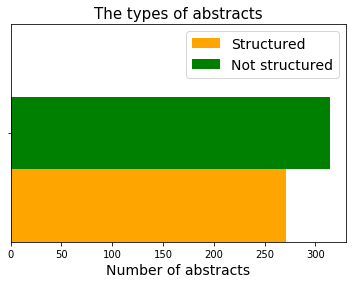

In [38]:
df = pandas.DataFrame(dict(graph=[''],
                           structured=[abstract_structured_count], 
                           not_structured=[doc_count-abstract_structured_count])) 
ind = np.arange(len(df))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, df.structured, width, color='orange', label='Structured')
ax.barh(ind + width, df.not_structured, width, color='green', label='Not structured')

ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
ax.legend(fontsize=14)
ax.set_xlabel('Number of abstracts', fontsize=14)
ax.set_title('The types of abstracts', fontsize=15)
plt.show()

# Data preprocessing